In [23]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from datetime import datetime

current_date = datetime.now()
formatted_date = current_date.strftime("%Y.%m.%d")

root = '/Users/grantongo/Desktop/nature methods/figures/figure 3'

median spearman coef = 0.92
total sensors= 32
total sensors with pval <0.05 = 23


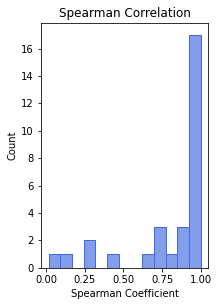

In [56]:
# figure: spearman correlation 

df = pd.read_csv(f'{root}/data_xMAP_nELISA_head2head_2025.01.14.csv')
df_spearman = pd.DataFrame()

for sensor in df.sensor.unique(): 
    df_sp = df[(df.sensor==sensor) & (df.sample_type=='PBMC')].dropna(subset='nelisa (pgml)')
    
    if len(df_sp)>0:
        coef, p = spearmanr(df_sp['nelisa (pgml)'],
                            df_sp['xmap (pgml)'])
        df_spearman = pd.concat((df_spearman,
                                 pd.DataFrame({'sensor':[sensor],
                                               'coef':[coef],
                                               'pval':[p],
                                               'n_datapoints':[len(df_sp)]})), axis=0)
        
df_spearman.to_csv(f'{root}/data_xmap.vs.nelisa.spearman_{formatted_date}.csv')

#df_spearman = df_spearman[df_spearman.pval<0.05] 

print(f'median spearman coef = {np.round(np.nanmedian(df_spearman.coef),decimals=2)}')
print(f'total sensors= {len(df_spearman)}')
print(f'total sensors with pval <0.05 = {len(df_spearman[df_spearman.pval<0.05])}')

fig, ax = plt.subplots(1,1,figsize=(3,4.5),gridspec_kw={'wspace':0.4, 'hspace':0.4})
ax = sbn.histplot(abs(df_spearman.coef),
                  color='royalblue',
                  bins=13, 
                  edgecolor='royalblue',
                  alpha=0.65
                )
ax.set_xlabel('Spearman Coefficient')
ax.set_ylabel('Count')
ax.set_title('Spearman Correlation')

fig.savefig(f'{root}/svg_xmap.vs.nelisa.spearman.histogram_{formatted_date}.svg',dpi=300)

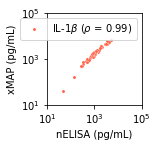

In [57]:
# figure: spearman inset figure

sensors_to_plot = ['IL-1 beta']

fig, ax = plt.subplots(1,1,figsize=(1.7,1.7),gridspec_kw={'wspace':0, 'hspace':0})
for i, p in zip(range(0,len(sensors_to_plot)),sensors_to_plot):
    
    if p ==  'IL-1 alpha':
        label =  f'IL-1$\\alpha$'
    elif p ==  'IL-1 beta':
        label =  f'IL-1$\\beta$'
    else:
        label=p
        
    ax = sbn.scatterplot(data=df[(df.sensor==p) &
                                 (df.sample_type=='PBMC')], 
                         x='nelisa (pgml)', 
                         y='xmap (pgml)',
                         color='tomato',
                         s=10,
                         label=f'{label} ($\\rho$ = {str(np.round(df_spearman[df_spearman.sensor==p].coef.to_numpy(),decimals=2)[0])})', 
                         ax=ax)
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_ylabel('xMAP (pg/mL)')
    ax.set_xlabel('nELISA (pg/mL)')
    ax.set_ylim(10,100000)
    ax.set_xlim(10,100000)
    ax.yaxis.tick_left()

    fig.savefig(f'{root}/svg_xmap.vs.nelisa.spearman.histogram.inset_{formatted_date}.svg',dpi=300)

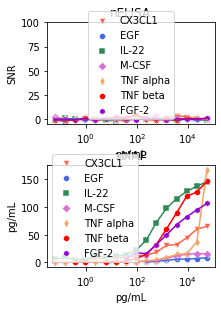

In [58]:
# figure: sample complexity 

df = pd.read_csv(f'{root}/data_xMAP_nELISA_head2head_2025.01.14.csv')
df = df[df.sample_type=='MMP3 serial dilution']

ag_pool3 = ['CX3CL1', 'EGF', 'IL-22', 'M-CSF', 'TNF alpha', 'TNF beta','FGF-2']
marker_style = ['v','o','s','D','d','o','h','>']
marker_color = ['tomato','royalblue','seagreen','orchid','sandybrown','red','darkviolet']

fig, ax = plt.subplots(2,1,figsize=(3,4.5), gridspec_kw={'hspace':0.4})
ax = ax.ravel()

for ag, ms, mc in zip(ag_pool3, marker_style, marker_color):
    
    sbn.scatterplot(x=df[df.sensor==ag].antigen_concentration, 
                    y=df[df.sensor==ag]['nelisa (snr)'], 
                    marker=ms, 
                    color=mc, 
                    label=ag, 
                    ax=ax[0])
    sbn.lineplot(x=df[df.sensor==ag].antigen_concentration, 
                 y=df[df.sensor==ag]['nelisa (snr)'], 
                 color=mc, 
                 ax=ax[0])
    sbn.scatterplot(x=df[df.sensor==ag].antigen_concentration, 
                    y=df[df.sensor==ag]['xmap (pgml)'], 
                    marker=ms, 
                    color=mc, 
                    label=ag, 
                    ax=ax[1])
    sbn.lineplot(x=df[df.sensor==ag].antigen_concentration, 
                 y=df[df.sensor==ag]['xmap (pgml)'], 
                 color=mc, 
                 ax=ax[1])

ax[0].set_xscale('log')
ax[0].set_ylim(-5,100)
ax[0].set_ylabel('SNR')
ax[0].set_xlabel('pg/mL')
ax[0].set_title('nELISA')

ax[1].set_xscale('log')
ax[1].set_ylabel('pg/mL')
ax[1].set_xlabel('pg/mL')
ax[1].set_title('xMAP')

fig.savefig(f'{root}/svg_xmap.vs.nelisa.sample.complexity_{formatted_date}.svg',dpi=300)